In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import networkx as nx
G = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/facebook_combined.txt", nodetype=int)

In [3]:
print(len(G))

4039


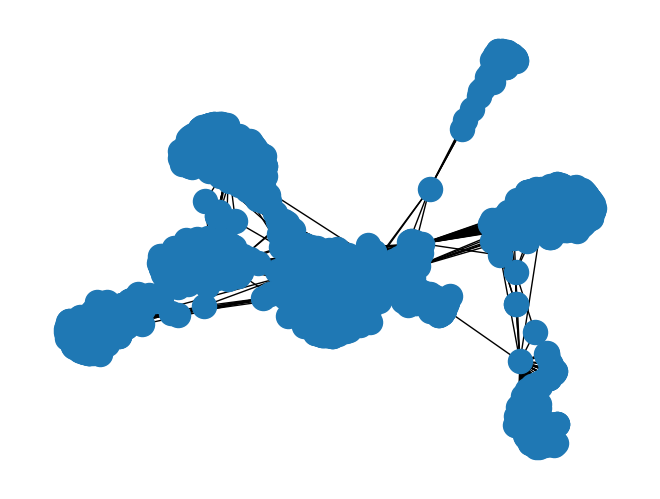

In [4]:
nx.draw(G)

In [4]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G)
print([community for community in communities])

[{0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 29, 30, 31, 37, 38, 39, 40, 43, 45, 47, 48, 50, 51, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 87, 88, 96, 98, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 153, 155, 156, 157, 158, 160, 161, 164, 165, 166, 168, 169, 170, 172, 176, 178, 183, 185, 186, 188, 190, 191, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 215, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 246, 247, 248, 250, 252, 257, 258, 260, 261, 265, 267, 268, 269, 270, 271, 272, 274, 276, 277, 280, 283, 285, 286, 287, 288, 290, 291, 292, 294, 295, 297, 298, 301, 303, 304, 308, 311, 313, 314, 315, 316, 317, 318, 322, 323, 324, 325, 329, 331, 332, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347}, {2, 262, 137, 138, 140, 14, 144, 17, 19, 20, 149, 151, 279, 28, 32, 289, 

In [5]:
node1 = 3980
node2 = 4020
distance = nx.shortest_path_length(G, source=node1, target=node2)
print(distance)

1


In [6]:
#all nodes and node degree in one frame for one hop
#node data
import pandas as pd
nodeData = []
for i in range(len(G)):
  ndData = []

  # Initialize deg outside the loop to avoid overwriting
  deg = G.degree[i]
  node_data = [i, deg]
  ndData.append(node_data)

  #extend it to the node data
  nodeData.extend(ndData)


# Define column names
columns = ['Node', 'NodeDegree']

# Create a DataFrame
onehop = pd.DataFrame(nodeData, columns=columns)

# Display the DataFrame
print(onehop)

      Node  NodeDegree
0        0         347
1        1          17
2        2          10
3        3          17
4        4          10
...    ...         ...
4034  4034           2
4035  4035           1
4036  4036           2
4037  4037           4
4038  4038           9

[4039 rows x 2 columns]


In [7]:
import pandas as pd
import networkx as nx
from itertools import combinations

commonsty_data = []

for node in range(len(G)):
    abData = []
    acData = sorted(nx.all_neighbors(G, node))

    # Use itertools.combinations to iterate over unique pairs of elements in acData
    for neighbor1, neighbor2 in combinations(acData, 2):
        # Check if the common neighbors have 1 unit distance with the original nodes

        N = nx.shortest_path_length(G, source=neighbor1, target=neighbor2)



        # Count only when the shortest distance is 1
        if N == 1:
            abData.append(1)

    commonsty_data.append(sum(abData))  # Append the sum of abData for the current node

# Create a DataFrame from the list of sums
commonstydf = pd.DataFrame(commonsty_data, columns=["Common Connections"])

# Display the DataFrame
print(commonstydf)

      Common Connections
0                   2519
1                     57
2                     40
3                     86
4                     39
...                  ...
4034                   1
4035                   0
4036                   1
4037                   4
4038                  20

[4039 rows x 1 columns]


In [8]:
#near degree data
degree_data = []

for node in range(len(G)):
    abData = []
    acData = sorted(nx.all_neighbors(G, node))

    for j in acData:
        M =G.degree(j)
        abData.append(M)

    degree_data.append(abData)  # Append a new list as a row to all_data

# Create a DataFrame from the list of lists
degreedf = pd.DataFrame(degree_data, columns= [f'{i} degree connections' for i in range(1, 1046)])

# Display the DataFrame
print(degreedf)

# Assuming you have a list of 100 values named values_to_count
values_to_count = range(1046)  # Replace ... with the actual values

# Add columns for each value in values_to_count
for value in values_to_count:
    column_name = f'{value}_count'
    degreedf[column_name] = degreedf.apply(lambda row: row.eq(value).sum(), axis=1)

print(degreedf)

      1 degree connections  2 degree connections  3 degree connections  \
0                       17                  10.0                  17.0   
1                      347                  22.0                  31.0   
2                      347                  15.0                  21.0   
3                      347                  57.0                  69.0   
4                      347                   9.0                   5.0   
...                    ...                   ...                   ...   
4034                    59                  18.0                   NaN   
4035                    59                   NaN                   NaN   
4036                    59                   4.0                   NaN   
4037                    59                  14.0                  12.0   
4038                    59                   6.0                  10.0   

      4 degree connections  5 degree connections  6 degree connections  \
0                     10.0           

In [19]:
df_dropped = degreedf.drop(degreedf.columns[:1045], axis=1)
print(df_dropped)

      0_count  1_count  2_count  3_count  4_count  5_count  6_count  7_count  \
0           0       14       27       22       17       12       15       18   
1           0        0        0        0        0        0        0        1   
2           0        0        0        0        0        0        0        0   
3           0        0        0        1        0        1        0        0   
4           0        0        0        0        0        1        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4034        0        0        0        0        0        0        0        0   
4035        0        0        0        0        0        0        0        0   
4036        0        0        0        0        1        0        0        0   
4037        0        0        0        0        0        0        0        0   
4038        0        0        0        0        0        0        2        1   

      8_count  9_count  ...  1036_count

In [20]:
#dropping columns in degreedf
df_dropped = df_dropped.drop(df_dropped.columns[793:1045], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[756:792], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[548:755], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[348:547], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[295:347], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[292:294], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[255:291], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[246:254], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[236:245], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[232:234], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[230:231], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[227:229], axis=1)
df_dropped = df_dropped.drop(df_dropped.columns[225:226], axis=1)
# Display the DataFrame after dropping columns
print(df_dropped)

      0_count  1_count  2_count  3_count  4_count  5_count  6_count  7_count  \
0           0       14       27       22       17       12       15       18   
1           0        0        0        0        0        0        0        1   
2           0        0        0        0        0        0        0        0   
3           0        0        0        1        0        1        0        0   
4           0        0        0        0        0        1        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4034        0        0        0        0        0        0        0        0   
4035        0        0        0        0        0        0        0        0   
4036        0        0        0        0        1        0        0        0   
4037        0        0        0        0        0        0        0        0   
4038        0        0        0        0        0        0        2        1   

      8_count  9_count  ...  235_count 

In [5]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[(107, 1045), (1684, 792), (1912, 755), (3437, 547), (0, 347), (2543, 294), (2347, 291), (1888, 254), (1800, 245), (1663, 235), (1352, 234), (2266, 234), (483, 231), (348, 229), (1730, 226), (1985, 224), (1941, 223), (2233, 222), (2142, 221), (1431, 220), (1199, 217), (1584, 211), (2206, 210), (1768, 209), (2229, 207), (2410, 207), (2611, 207), (1086, 205), (1589, 205), (2047, 205), (2218, 205), (2078, 204), (1993, 203), (2123, 203), (1746, 202), (2464, 202), (1827, 201), (2240, 201), (2507, 201), (2560, 201), (2244, 200), (1983, 199), (2309, 199), (1126, 198), (2088, 198), (2131, 198), (2340, 198), (2602, 198), (2324, 197), (2369, 197), (2590, 197), (2542, 196), (2604, 196), (1804, 195), (2073, 195), (2220, 195), (2607, 195), (2188, 194), (1390, 193), (2059, 193), (2172, 193), (1943, 192), (2150, 192), (1833, 191), (1946, 191), (2428, 191), (2526, 191), (1377, 190), (1612, 190), (1917, 190), (2201, 190), (2331, 190), (2601, 190), (1621, 189), (1938, 189), (2090, 189), (2384, 188), (21

In [59]:
#adding all dataframes into one data frame
kmeansonehop_df = pd.concat([onehop, df_dropped, commonstydf], axis=1)
print(kmeansonehop_df)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  245_count 

In [60]:
kmeansonehop_df.isna()

,Node,NodeDegree,0_count,1_count,2_count,3_count,4_count,5_count,6_count,7_count,...,245_count,254_count,291_count,294_count,347_count,547_count,755_count,792_count,1045_count,Common Connections
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

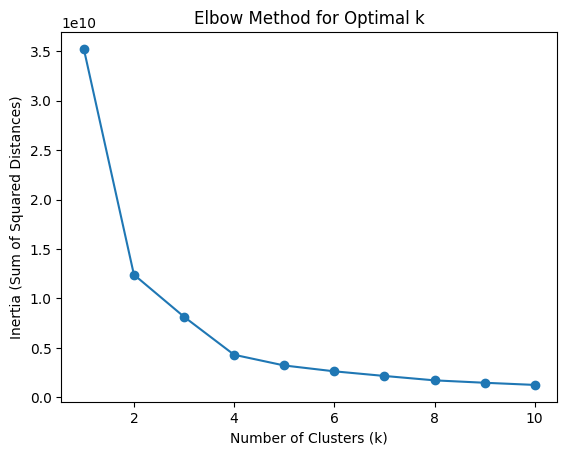

In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with standardized features
# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(kmeansonehop_df)

# Store the sum of squared distances for different values of k
inertia_values = []

# Define a range of k values to try
k_values = range(1, 11)  # You can adjust the range based on your problem

# Apply k-means clustering for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeansonehop_df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  254_count 

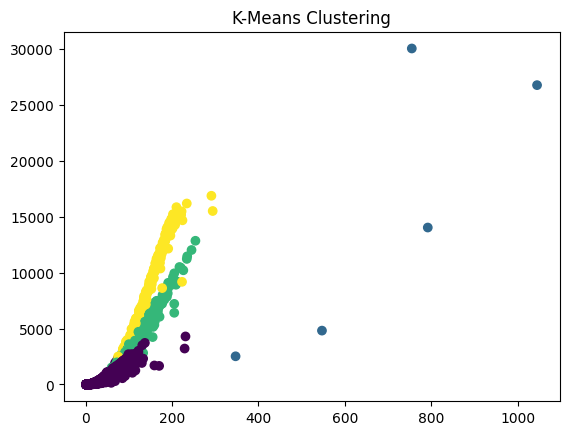

In [62]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(kmeansonehop_df)

# Step 3: Apply k-means clustering
k = 4  # Replace with your optimal k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeansonehop_df['k=4_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kmeansonehop_df)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kmeansonehop_df["NodeDegree"], kmeansonehop_df['Common Connections'], c=kmeansonehop_df['k=4_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

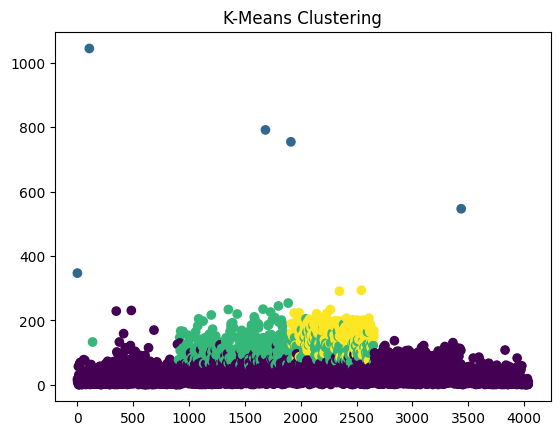

In [63]:
plt.scatter(kmeansonehop_df["Node"], kmeansonehop_df['NodeDegree'], c=kmeansonehop_df['k=4_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  291_count 

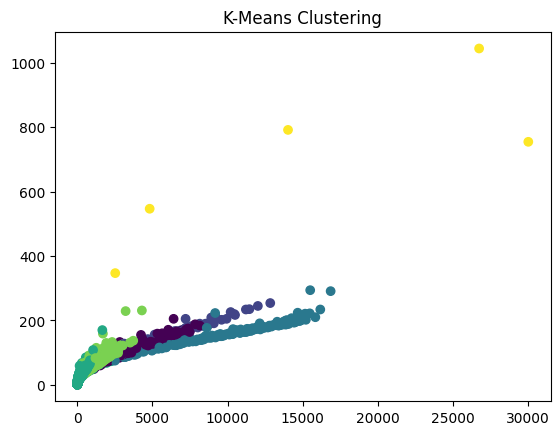

In [64]:
 #Step 3: Apply k-means clustering
N = 6  # Replace with your optimal k
kmeans = KMeans(n_clusters=N, random_state=42)
kmeansonehop_df['k = 6_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kmeansonehop_df)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kmeansonehop_df["Common Connections"], kmeansonehop_df['NodeDegree'], c=kmeansonehop_df['k = 6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

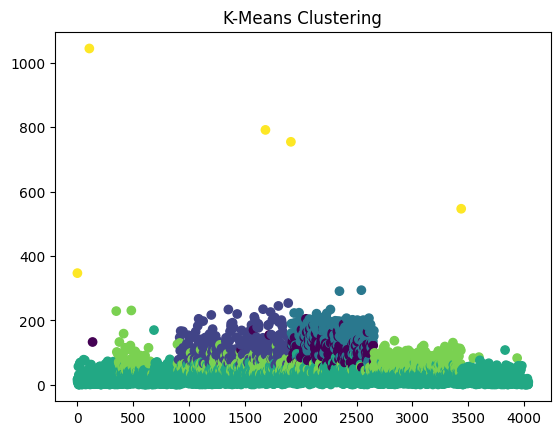

In [65]:
plt.scatter(kmeansonehop_df["Node"], kmeansonehop_df['NodeDegree'], c=kmeansonehop_df['k = 6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

In [66]:
aggonehop_df = pd.concat([onehop, df_dropped, commonstydf], axis=1)
print(aggonehop_df)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  245_count 

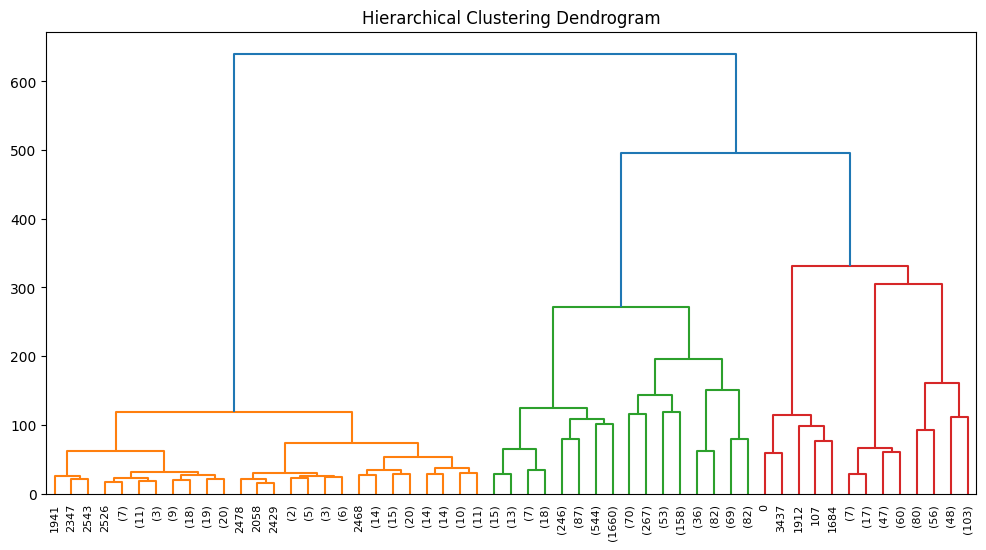

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  254_count 

In [67]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame

# Step 1: Standardize the data (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(aggonehop_df)

# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 3  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)


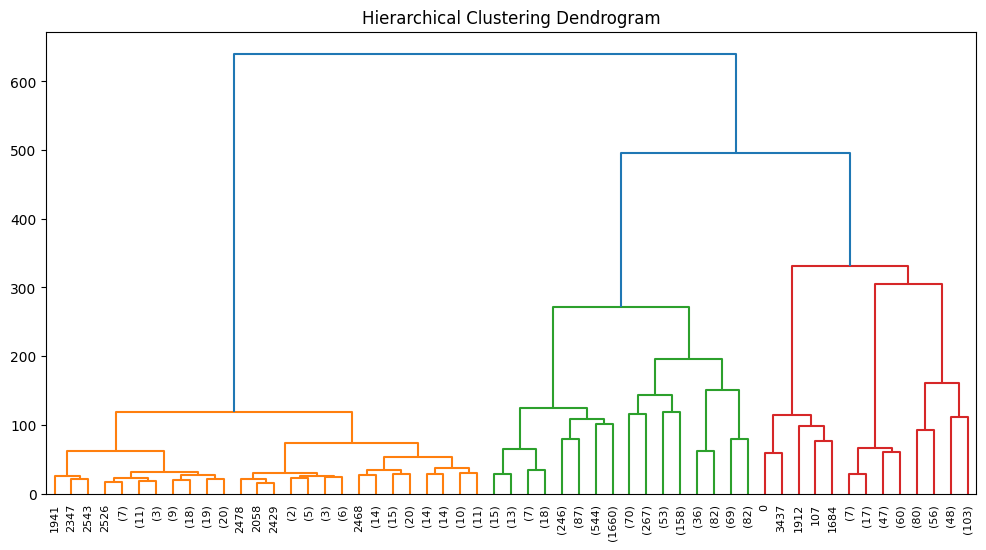

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  291_count 

In [68]:
# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 4  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['4_Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

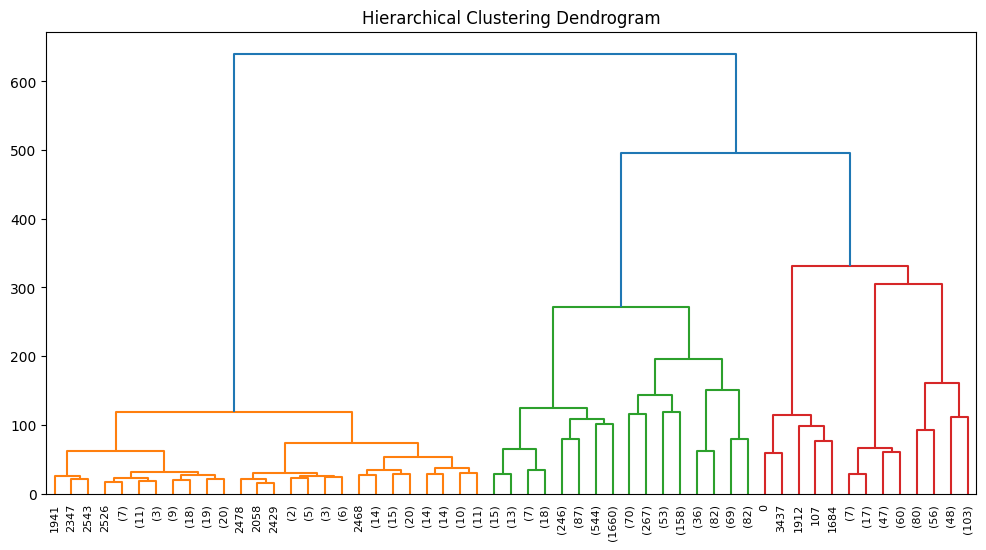

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  294_count 

In [69]:
# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['6_Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

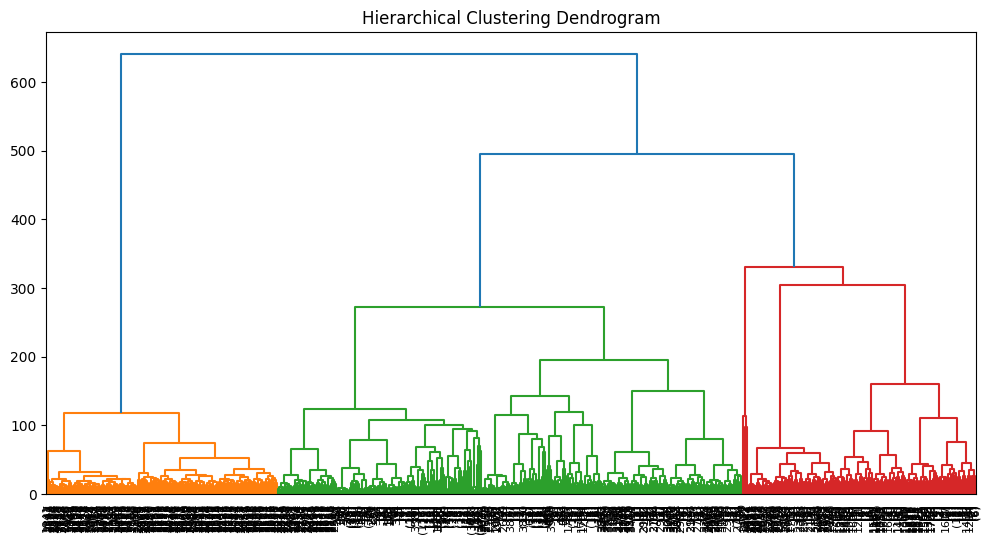

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  347_count 

In [70]:
# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['6_Cluster1'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

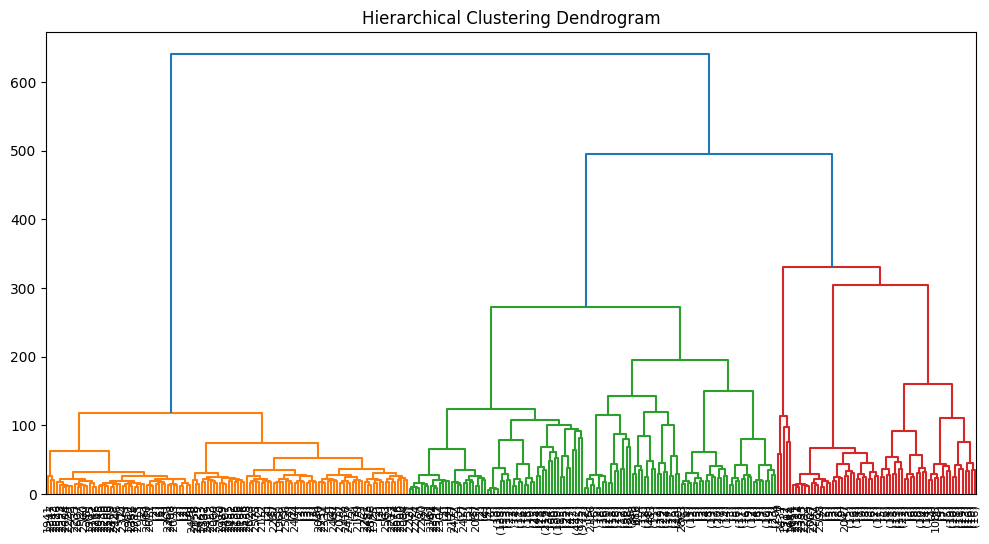

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  547_count 

In [71]:
# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 8  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['8_Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

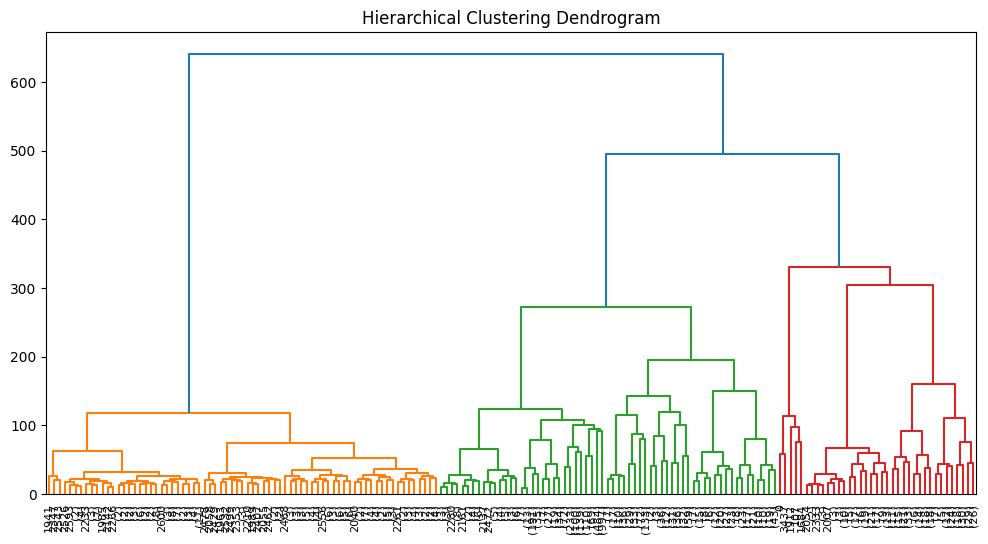

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  755_count 

In [72]:
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=7)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['6_Cluster2'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

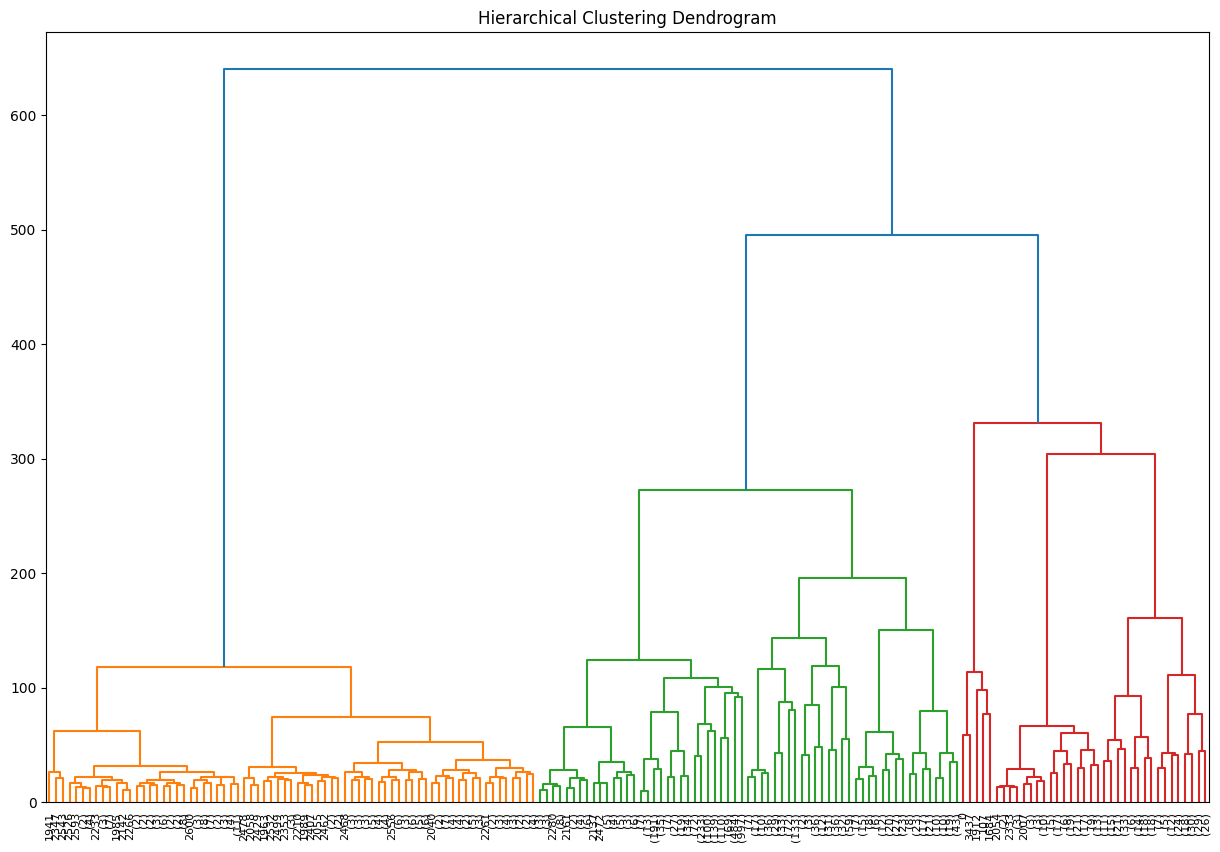

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  792_count 

In [73]:
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=7)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonehop_df['6_Cluster3'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonehop_df)

In [ ]:
#DBSCAN Dataset
dbonehopdf = pd.concat([onehop, df_dropped, commonstydf], axis=1)
print(dbonehopdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  254_count 

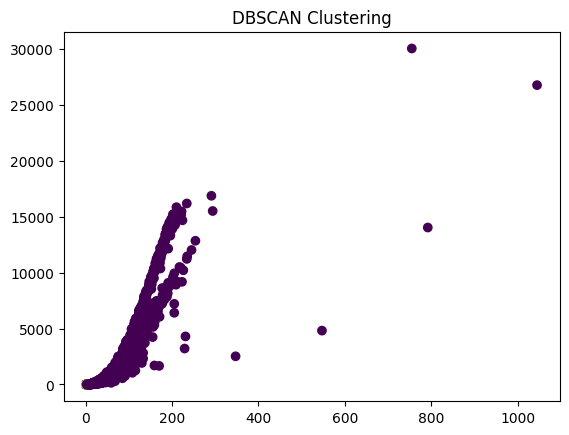

In [75]:
#dbscan algorithm
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Standardize the data (required for DBSCAN)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(dbonehopdf)

# Step 2: Apply DBSCAN
# Choose appropriate values for `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other)
# and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbonehopdf['Cluster'] = dbscan.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(dbonehopdf)

# Step 3: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
plt.scatter(dbonehopdf['NodeDegree'], dbonehopdf['Common Connections'], c=dbonehopdf['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [76]:
#walk trap
import networkx as nx
from networkx.algorithms.community import asyn_walktrap
import matplotlib.pyplot as plt

# Assuming G is your graph (you can create it using nx.Graph() and add edges/nodes)

# Apply Walktrap algorithm
walktrap_communities = asyn_walktrap(G, steps=4).communities

# Convert communities to a dictionary for visualization
community_dict = {}
for idx, community in enumerate(walktrap_communities):
    for node in community:
        community_dict[node] = idx

# Visualize the graph with community colors
pos = nx.spring_layout(G)
node_colors = [community_dict[node] for node in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, font_weight='bold')
plt.title('Walktrap Community Detection')
plt.show()


ImportError: ignored

In [77]:
pip install --upgrade networkx


In [8]:
from networkx.algorithms.community import label_propagation_communities
nx.label_propagation_communities(G)


AttributeError: ignored

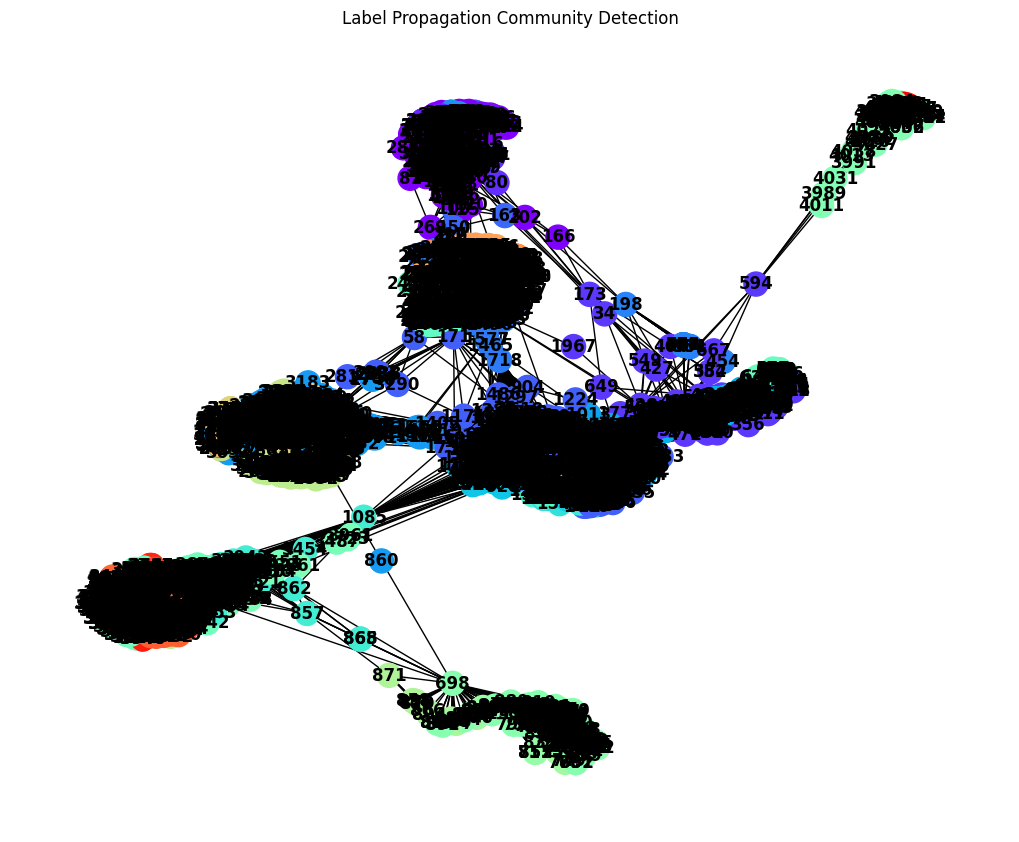

In [83]:
import networkx as nx
from networkx.algorithms.community import asyn_lpa_communities

# Assuming G is your graph (you can create it using nx.Graph() and add edges/nodes)
label_propagation_communities(G)
# Apply Walktrap algorithm
walktrap_communities = list(asyn_lpa_communities(G))

# Convert communities to a dictionary for visualization
community_dict = {}
for idx, community in enumerate(walktrap_communities):
    for node in community:
        community_dict[node] = idx

# Visualize the graph with community colors
pos = nx.spring_layout(G)
node_colors = [community_dict[node] for node in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, font_weight='bold')
plt.title('Label Propagation Community Detection')
plt.show()


In [60]:
nx.clustering(G)

{0: 0.04196165314587463,
 1: 0.41911764705882354,
 2: 0.8888888888888888,
 3: 0.6323529411764706,
 4: 0.8666666666666667,
 5: 0.3333333333333333,
 6: 0.9333333333333333,
 7: 0.43157894736842106,
 8: 0.6785714285714286,
 9: 0.39724310776942356,
 10: 0.8222222222222222,
 11: 0,
 12: 0,
 13: 0.6516129032258065,
 14: 0.7428571428571429,
 15: 0,
 16: 0.6666666666666666,
 17: 0.7307692307692307,
 18: 0,
 19: 0.2833333333333333,
 20: 0.6857142857142857,
 21: 0.3490384615384615,
 22: 0.4727272727272727,
 23: 0.16911764705882354,
 24: 0.9,
 25: 0.2885763000852515,
 26: 0.4113257243195786,
 27: 0.9,
 28: 0.7692307692307693,
 29: 0.46153846153846156,
 30: 0.5,
 31: 0.43478260869565216,
 32: 1.0,
 33: 1.0,
 34: 0.6,
 35: 1.0,
 36: 0.9636363636363636,
 37: 0,
 38: 0.3611111111111111,
 39: 0.49523809523809526,
 40: 0.4048625792811839,
 41: 0.4673913043478261,
 42: 1.0,
 43: 0,
 44: 1.0,
 45: 0.7272727272727273,
 46: 1.0,
 47: 1.0,
 48: 0.329004329004329,
 49: 0.5,
 50: 0.5636363636363636,
 51: 0.857

In [9]:
import pandas as pd
A = nx.average_neighbor_degree(G)
B = nx.node_degree_xy(G)
print(A)
average_degrees = [round(value, 2) for value in A.values()]

# Create a DataFrame with a single column
adcdf = pd.DataFrame({'Average Degree Connectivity': average_degrees})

# Display the DataFrame
print(adcdf)


{0: 18.959654178674352, 1: 48.23529411764706, 2: 49.9, 3: 59.76470588235294, 4: 42.6, 5: 50.61538461538461, 6: 63.5, 7: 45.9, 8: 48.375, 9: 42.40350877192982, 10: 79.1, 11: 347.0, 12: 347.0, 13: 54.54838709677419, 14: 38.666666666666664, 15: 347.0, 16: 66.88888888888889, 17: 42.76923076923077, 18: 347.0, 19: 33.125, 20: 37.4, 21: 42.4, 22: 53.72727272727273, 23: 28.11764705882353, 24: 41.625, 25: 36.94202898550725, 26: 42.279411764705884, 27: 94.6, 28: 41.76923076923077, 29: 54.0, 30: 59.23529411764706, 31: 50.04347826086956, 32: 66.66666666666667, 33: 174.5, 34: 172.4, 35: 179.5, 36: 45.18181818181818, 37: 347.0, 38: 64.11111111111111, 39: 57.53333333333333, 40: 45.25, 41: 27.791666666666668, 42: 174.5, 43: 347.0, 44: 74.0, 45: 66.25, 46: 79.4, 47: 175.0, 48: 43.72727272727273, 49: 89.0, 50: 63.54545454545455, 51: 69.0, 52: 176.0, 53: 32.483870967741936, 54: 68.875, 55: 70.82352941176471, 56: 40.666666666666664, 57: 46.8, 58: 250.33333333333334, 59: 57.578947368421055, 60: 87.625, 61:

In [116]:
r = nx.local_bridges(G, with_span=False)
print(list(r))

[(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (58, 1912), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 860), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 860), (698, 875), (698, 883), (698, 891), (698, 892)]


In [10]:
node_bridge_counts = {}

# Iterate over nodes from 0 to (number of nodes - 1)
for node in range(len(G)):
    # Create a subgraph containing only the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate local bridges for the subgraph
    local_bridges = list(nx.local_bridges(subgraph, with_span=False))

    # Count the number of bridges for the current node
    bridge_count = len(local_bridges)

    # Store the result in the dictionary
    node_bridge_counts[node] = bridge_count

# Convert the dictionary to a DataFrame
brdf = pd.DataFrame(list(node_bridge_counts.values()), columns=['Bridge_Count'])

# Display the DataFrame
print(brdf)

      Bridge_Count
0               14
1                0
2                0
3                0
4                0
...            ...
4034             0
4035             1
4036             0
4037             0
4038             0

[4039 rows x 1 columns]


In [87]:
subgraph = G.subgraph([0] + list(G.neighbors(0)))
print(subgraph)


Graph with 348 nodes and 2866 edges


In [9]:
G.degree(1)

17

In [14]:
nx.community.louvain_communities(G, seed=123)
print(len(list(nx.community.louvain_partitions(G))))

3


In [44]:
#The algorithm is based on the simple idea of fluids interacting in an environment,
#expanding and pushing each other. Its initialization is random, so found communities may vary on different executions.
print((list(nx.community.asyn_fluidc(G, 30, max_iter=100, seed=None))))


[{526, 897, 906, 907, 916, 921, 925, 926, 927, 932, 934, 946, 947, 952, 953, 959, 960, 966, 967, 972, 978, 980, 982, 983, 993, 995, 997, 999, 1003, 1004, 1006, 1017, 1024, 1026, 1028, 1029, 1039, 1040, 1047, 1048, 1049, 1054, 1056, 1059, 1063, 1068, 1069, 1074, 1075, 1076, 1078, 1079, 1083, 1084, 1086, 1091, 1092, 1101, 1107, 1110, 1112, 1116, 1117, 1123, 1124, 1125, 1126, 1128, 1130, 1132, 1135, 1146, 1149, 1153, 1156, 1160, 1163, 1164, 1172, 1173, 1175, 1180, 1181, 1182, 1184, 1185, 1191, 1195, 1196, 1198, 1199, 1201, 1205, 1207, 1209, 1211, 1214, 1219, 1222, 1230, 1238, 1239, 1242, 1243, 1250, 1255, 1256, 1265, 1267, 1269, 1271, 1272, 1278, 1280, 1285, 1287, 1288, 1289, 1290, 1291, 1293, 1302, 1305, 1312, 1323, 1329, 1330, 1331, 1334, 1335, 1336, 1339, 1340, 1341, 1344, 1351, 1352, 1359, 1361, 1365, 1367, 1370, 1375, 1376, 1377, 1380, 1388, 1389, 1390, 1391, 1393, 1398, 1399, 1401, 1402, 1407, 1409, 1411, 1416, 1420, 1431, 1435, 1437, 1439, 1447, 1449, 1456, 1457, 1458, 1460, 1463, 

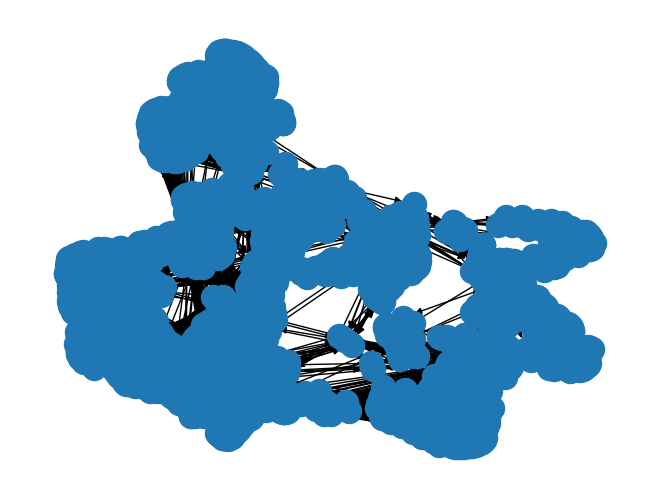

In [29]:
P = nx.connectivity.build_auxiliary_node_connectivity(G)
nx.draw(P)

In [11]:
#Returns the core number for each vertex.

#A k-core is a maximal subgraph that contains nodes of degree k or more.

#The core number of a node is the largest value k of a k-core containing that node.
C = nx.core_number(G)
print(C)

coredf = pd.DataFrame(list(C.values()), columns=['Core_Number'])

# Display the DataFrame
print(coredf)

{0: 21, 1: 13, 2: 9, 3: 13, 4: 9, 5: 10, 6: 5, 7: 12, 8: 5, 9: 21, 10: 10, 11: 1, 12: 1, 13: 21, 14: 10, 15: 1, 16: 9, 17: 9, 18: 1, 19: 7, 20: 9, 21: 21, 22: 9, 23: 7, 24: 15, 25: 21, 26: 21, 27: 5, 28: 10, 29: 9, 30: 14, 31: 14, 32: 6, 33: 2, 34: 5, 35: 2, 36: 10, 37: 1, 38: 8, 39: 12, 40: 21, 41: 10, 42: 2, 43: 1, 44: 6, 45: 11, 46: 5, 47: 2, 48: 14, 49: 2, 50: 10, 51: 7, 52: 2, 53: 15, 54: 7, 55: 17, 56: 21, 57: 12, 58: 6, 59: 17, 60: 8, 61: 3, 62: 19, 63: 6, 64: 7, 65: 11, 66: 15, 67: 21, 68: 7, 69: 10, 70: 2, 71: 3, 72: 18, 73: 9, 74: 1, 75: 12, 76: 3, 77: 5, 78: 9, 79: 12, 80: 15, 81: 2, 82: 18, 83: 7, 84: 10, 85: 12, 86: 6, 87: 11, 88: 13, 89: 5, 90: 2, 91: 5, 92: 15, 93: 6, 94: 15, 95: 5, 96: 8, 97: 3, 98: 21, 99: 7, 100: 7, 101: 15, 102: 6, 103: 14, 104: 21, 105: 12, 106: 8, 107: 70, 108: 11, 109: 21, 110: 5, 111: 9, 112: 3, 113: 21, 114: 1, 115: 10, 116: 10, 117: 5, 118: 21, 119: 21, 120: 3, 121: 10, 122: 21, 123: 17, 124: 3, 125: 4, 126: 6, 127: 11, 128: 21, 129: 7, 130: 13

In [12]:
#Returns the layer of each vertex in an onion decomposition of the graph.

#The onion decomposition refines the k-core decomposition by providing information on the internal organization of each k-shell.
#It is usually used alongside the core numbers.#
O = nx.onion_layers(G)
print(O)
sorted_keys = sorted(O.keys())

# Create a DataFrame from the dictionary with sorted keys
oniondf = pd.DataFrame.from_dict({key: O[key] for key in sorted_keys}, orient='index', columns=['onion layers'])

# Display the DataFrame
print(oniondf)

{11: 1, 12: 1, 15: 1, 18: 1, 37: 1, 43: 1, 74: 1, 114: 1, 209: 1, 210: 1, 215: 1, 287: 1, 292: 1, 335: 1, 911: 1, 918: 1, 1096: 1, 1119: 1, 1145: 1, 1206: 1, 1386: 1, 1466: 1, 1560: 1, 1581: 1, 1834: 1, 358: 1, 447: 1, 550: 1, 585: 1, 602: 1, 607: 1, 608: 1, 613: 1, 624: 1, 638: 1, 668: 1, 674: 1, 692: 1, 801: 1, 875: 1, 883: 1, 891: 1, 892: 1, 2842: 1, 3031: 1, 3071: 1, 3183: 1, 3230: 1, 2079: 1, 2195: 1, 2269: 1, 2457: 1, 2470: 1, 2569: 1, 2596: 1, 3451: 1, 3453: 1, 3570: 1, 3650: 1, 3709: 1, 3729: 1, 3748: 1, 3798: 1, 3820: 1, 3853: 1, 3856: 1, 3935: 1, 3974: 1, 3984: 1, 4008: 1, 4010: 1, 4015: 1, 4022: 1, 4024: 1, 4035: 1, 33: 2, 35: 2, 42: 2, 47: 2, 52: 2, 70: 2, 90: 2, 138: 2, 145: 2, 153: 2, 154: 2, 160: 2, 183: 2, 205: 2, 216: 2, 233: 2, 234: 2, 241: 2, 244: 2, 255: 2, 256: 2, 267: 2, 279: 2, 282: 2, 286: 2, 305: 2, 316: 2, 2814: 2, 1065: 2, 1176: 2, 1224: 2, 1233: 2, 1262: 2, 1270: 2, 1276: 2, 1326: 2, 1394: 2, 1395: 2, 1430: 2, 1558: 2, 1690: 2, 1755: 2, 1854: 2, 2704: 2, 274

In [13]:
#Returns the boundary expansion of the set S.

#The boundary expansion is the quotient of the size of the node boundary and the cardinality of S. [1]
boundary_expansion_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    boundary_expansion = nx.boundary_expansion(G, subgraph)

    # Append the boundary expansion to the list
    boundary_expansion_list.append(boundary_expansion)

# Create a DataFrame from the list
bounddf = pd.DataFrame({'Boundary_Expansion': boundary_expansion_list})

# Display the DataFrame
print(bounddf)

print(G)

      Boundary_Expansion
0               3.364943
1              18.333333
2              30.636364
3              18.333333
4              30.636364
...                  ...
4034           19.000000
4035           29.000000
4036           19.000000
4037           11.000000
4038            5.000000

[4039 rows x 1 columns]
Graph with 4039 nodes and 88234 edges


In [14]:
#The eccentricity of a node v is the maximum distance from v to all other nodes in G.
ecc = nx.eccentricity(G, v=None, sp=None, weight=None)
eccdf = pd.DataFrame(list(ecc.values()), columns=['eccentricity'])
print(eccdf)

      eccentricity
0                6
1                7
2                7
3                7
4                7
...            ...
4034             8
4035             8
4036             8
4037             8
4038             8

[4039 rows x 1 columns]


In [15]:
#The Kemeny constant measures the time needed for spreading across a graph. Low values indicate a closely connected graph whereas high values indicate a spread-out graph.
kemeny_list = []

# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    kemeny = nx.kemeny_constant(subgraph)

    # Append the boundary expansion to the list
    kemeny_list.append(kemeny)

# Create a DataFrame from the list
kemenydf = pd.DataFrame({'kemeny constant for network': kemeny_list})

# Display the DataFrame
print(kemenydf)


      kemeny constant for network
0                      406.232390
1                       17.493435
2                        9.177039
3                       16.649210
4                        9.196660
...                           ...
4034                     1.333333
4035                     0.500000
4036                     1.333333
4037                     3.362500
4038                     8.546052

[4039 rows x 1 columns]


In [16]:
#The average global efficiency of a graph is the average efficiency of all pairs of nodes
globaleff_list = []
weight_matching_list = []
random_list = []
panther_list = []
# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    globaleff = nx.global_efficiency(subgraph)

    weighteff = len(list(nx.max_weight_matching(subgraph, maxcardinality=False, weight='weight')))

    result = nx.non_randomness(subgraph, k=None, weight='weight')
    second_value = result[1]

    #panther = len(nx.panther_similarity(subgraph, 0, k=5, path_length=5, c=0.5, delta=0.1, eps=None, weight='weight'))

    # Append the boundary expansion to the list
    globaleff_list.append(globaleff)
    weight_matching_list.append(weighteff)
    random_list.append(second_value)
    #panther_list.append(panther)
# Create a DataFrame from the list
globaldf = pd.DataFrame({
    'global_efficiency': globaleff_list,
    'max_weight_matching': weight_matching_list,
    'random_probability': random_list,
    # 'panther_similarity': panther_list  # Uncomment if needed
})
# Display the DataFrame
print(globaldf)


/usr/local/lib/python3.10/dist-packages/networkx/algorithms/non_randomness.py:94: RuntimeWarning: invalid value encountered in double_scalars
  nr_rd = (nr - ((n - 2 * k) * p + k)) / math.sqrt(2 * k * p * (1 - p))
/usr/local/lib/python3.10/dist-packages/networkx/algorithms/non_randomness.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  nr_rd = (nr - ((n - 2 * k) * p + k)) / math.sqrt(2 * k * p * (1 - p))


      global_efficiency  max_weight_matching  random_probability
0              0.523734                  164           75.626117
1              0.741830                    9            0.814521
2              0.954545                    5            0.088836
3              0.836601                    9            1.395870
4              0.945455                    5            0.364554
...                 ...                  ...                 ...
4034           1.000000                    1                -inf
4035           1.000000                    1                 NaN
4036           1.000000                    1                -inf
4037           0.900000                    2           -0.135403
4038           0.822222                    5            0.266415

[4039 rows x 3 columns]


In [17]:
import numpy as np
globaldf.replace([np.inf, -np.inf], 0, inplace=True)
globaldf.isna()
globaldf.fillna(0)
print(globaldf)

      global_efficiency  max_weight_matching  random_probability
0              0.523734                  164           75.626117
1              0.741830                    9            0.814521
2              0.954545                    5            0.088836
3              0.836601                    9            1.395870
4              0.945455                    5            0.364554
...                 ...                  ...                 ...
4034           1.000000                    1            0.000000
4035           1.000000                    1                 NaN
4036           1.000000                    1            0.000000
4037           0.900000                    2           -0.135403
4038           0.822222                    5            0.266415

[4039 rows x 3 columns]


In [18]:
globaldf.isna()
globaldf.fillna(0)

,global_efficiency,max_weight_matching,random_probability
0,0.523734,164,75.626117
1,0.741830,9,0.814521
2,0.954545,5,0.088836
3,0.836601,9,1.395870
4,0.945455,5,0.364554
...,...,...,...
4034,1.000000,1,0.000000
4035,1.000000,1,0.000000
4036,1.000000,1,0.000000
4037,0.900000,2,-0.135403


In [19]:
subgraph1 = G.subgraph([107] + list(G.neighbors(107)))
print(subgraph1)

Graph with 1046 nodes and 27795 edges


In [13]:
#A matching is a subset of edges in which no node occurs more than once. The weight of a matching is the sum of the weights of its edges.
print(len(list(nx.max_weight_matching(subgraph1, maxcardinality=False, weight='weight'))))

9


In [14]:
#The second computed value nr_rd is a relative measure that indicates to what extent graph G is different from random graphs in terms of probability.
#When it is close to 0, the graph tends to be more likely generated by an Erdos Renyi model.
nx.non_randomness(subgraph1, k=None, weight='weight')


(9.314208118645762, 0.8145214752393702)

In [16]:
nx.panther_similarity(subgraph1, 0, k=5, path_length=5, c=0.5, delta=0.1, eps=None, weight='weight')

{1: 0.23673469387755103,
 322: 0.1959183673469388,
 53: 0.17142857142857143,
 315: 0.1673469387755102}

In [39]:
effsize_list = []
# Iterate over all nodes in the graph
for node in G.nodes():
    # Create a subgraph with the current node and its neighbors
    subgraph = G.subgraph([node] + list(G.neighbors(node)))

    # Calculate the boundary expansion for the current node
    effective_size_dict = nx.effective_size(subgraph)

    # Append the boundary expansion to the list
    effsize_list.append(sum(effective_size_dict.values()))
# Create a DataFrame from the list
effsizedf = pd.DataFrame({'Sum_Effective_Size': effsize_list})

# Display the DataFrame
print(effsizedf)

KeyboardInterrupt: ignored

In [39]:
#dataset final
kmeans_onehopdf = pd.concat([onehop, df_dropped, commonstydf, adcdf, brdf, coredf, oniondf, bounddf, kemenydf, globaldf, eccdf], axis=1)
print(kmeans_onehopdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Average De

In [40]:
kmeans_onehopdf.isna()
kmeans_onehopdf.fillna(0)

,Node,NodeDegree,0_count,1_count,2_count,3_count,4_count,5_count,6_count,7_count,...,Average Degree Connectivity,Bridge_Count,Core_Number,onion layers,Boundary_Expansion,kemeny constant for network,global_efficiency,max_weight_matching,random_probability,eccentricity
0,0,347,0,14,27,22,17,12,15,18,...,18.96,14,21,108,3.364943,406.232390,0.523734,164,75.626117,6
1,1,17,0,0,0,0,0,0,0,1,...,48.24,0,13,51,18.333333,17.493435,0.741830,9,0.814521,7
2,2,10,0,0,0,0,0,0,0,0,...,49.90,0,9,30,30.636364,9.177039,0.954545,5,0.088836,7
3,3,17,0,0,0,1,0,1,0,0,...,59.76,0,13,49,18.333333,16.649210,0.836601,9,1.395870,7
4,4,10,0,0,0,0,0,1,0,0,...,42.60,0,9,30,30.636364,9.196660,0.945455,5,0.364554,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,2,0,0,0,0,0,0,0,0,...,38.50,0,2,2,19.000000,1.333333,1.000000,1,0.000000,8
4035,4035,1,0,0,0,0,0,0,0,0,...,59.00,1,1,1,29.000000,0.500000,1.000000,1,0.000000,8
4036,4036,2,0,0,0,0,1,0,0,0,...,31.50,0,2,2,19.000000,1.333333,1.000000,1,0.000000,8
4037,4037,4,0,0,0,0,0,0,0,0,...,23.25,0,4,8,11.000000,3.362500,0.900000,2,-0.135403,8


In [41]:
kmeans_onehopdf.isna()

,Node,NodeDegree,0_count,1_count,2_count,3_count,4_count,5_count,6_count,7_count,...,Average Degree Connectivity,Bridge_Count,Core_Number,onion layers,Boundary_Expansion,kemeny constant for network,global_efficiency,max_weight_matching,random_probability,eccentricity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
kohdf = kmeans_onehopdf.fillna(0)
print(kohdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Average De

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

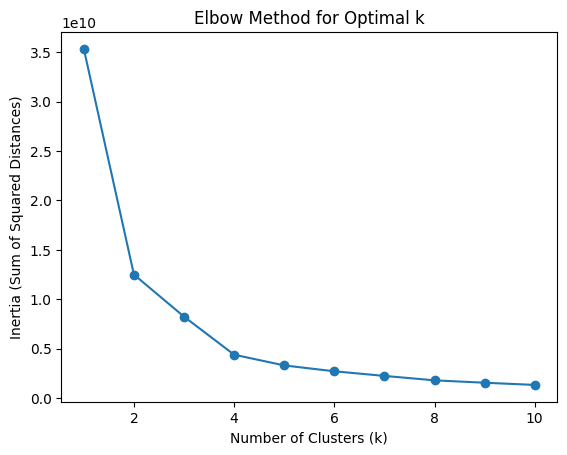

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with standardized features
# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(kohdf)

# Store the sum of squared distances for different values of k
inertia_values = []

# Define a range of k values to try
k_values = range(1, 11)  # You can adjust the range based on your problem

# Apply k-means clustering for each k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kohdf)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Bridge_Cou

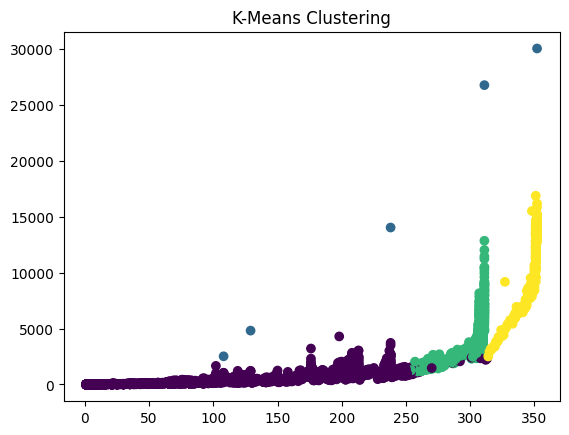

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(kohdf)

# Step 3: Apply k-means clustering
k = 4  # Replace with your optimal k
kmeans = KMeans(n_clusters=k, random_state=42)
kohdf['k=4_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kohdf)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kohdf["onion layers"], kohdf['Common Connections'], c=kohdf['k=4_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Core_Numbe

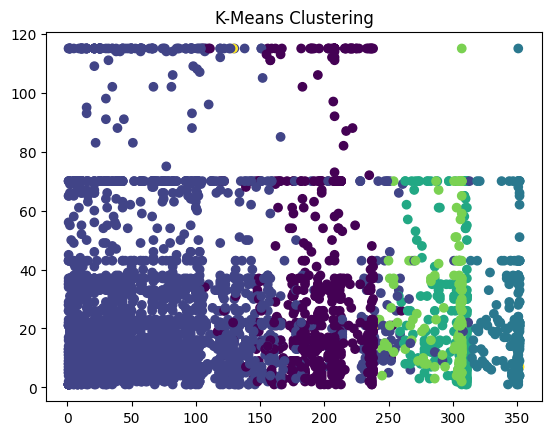

In [44]:
# Step 3: Apply k-means clustering
k1 = 6  # Replace with your optimal k
kmeans = KMeans(n_clusters=k1, random_state=42)
kohdf['k=6_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kohdf)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kohdf["onion layers"], kohdf['Core_Number'], c=kohdf['k=6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  onion laye

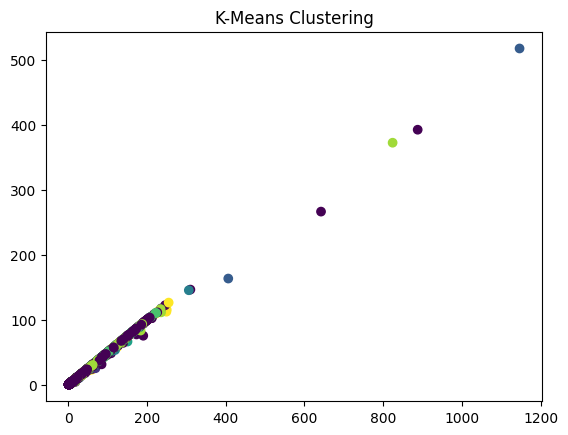

In [45]:
# Step 3: Apply k-means clustering
k2 = 8  # Replace with your optimal k
kmeans = KMeans(n_clusters=k2, random_state=42)
kohdf['k=8_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kohdf)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kohdf["kemeny constant for network"], kohdf['max_weight_matching'], c=kohdf['k=8_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

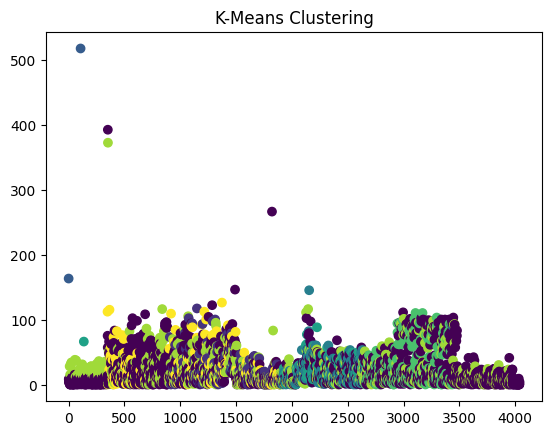

In [46]:
plt.scatter(kohdf["Node"], kohdf['max_weight_matching'], c=kohdf['k=8_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

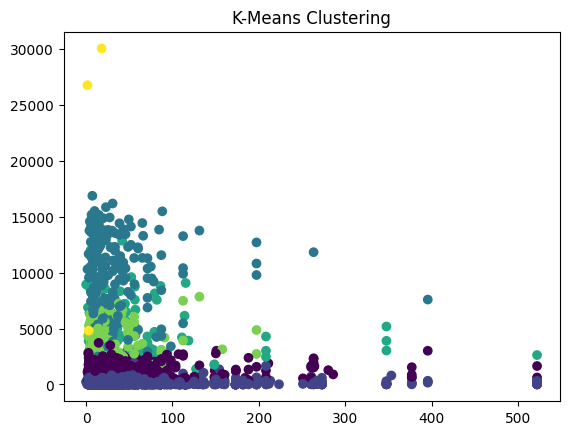

In [47]:
plt.scatter(kohdf["Boundary_Expansion"], kohdf['Common Connections'], c=kohdf['k=6_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Boundary_E

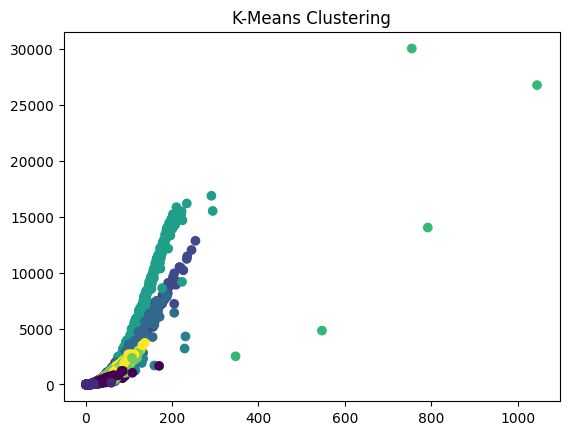

In [48]:
# Step 3: Apply k-means clustering
k3 = 10  # Replace with your optimal k
kmeans = KMeans(n_clusters=k3, random_state=42)
kohdf['k=10_Cluster'] = kmeans.fit_predict(features_standardized)

# Display the DataFrame with cluster assignments
print(kohdf)

# Step 4: Visualize the clusters (optional)
# This is just an example, adjust it based on your requirements
# Visualization is more challenging with a large number of features
# You may need to choose specific features for plotting or use advanced visualization techniques
plt.scatter(kohdf["NodeDegree"], kohdf['Common Connections'], c=kohdf['k=10_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

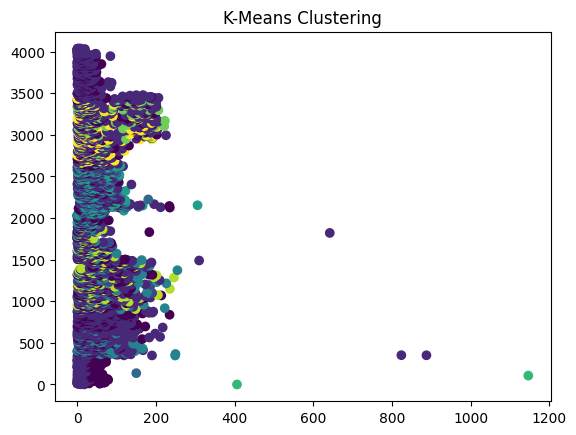

In [49]:
plt.scatter(kohdf["kemeny constant for network"], kohdf['Node'], c=kohdf['k=10_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

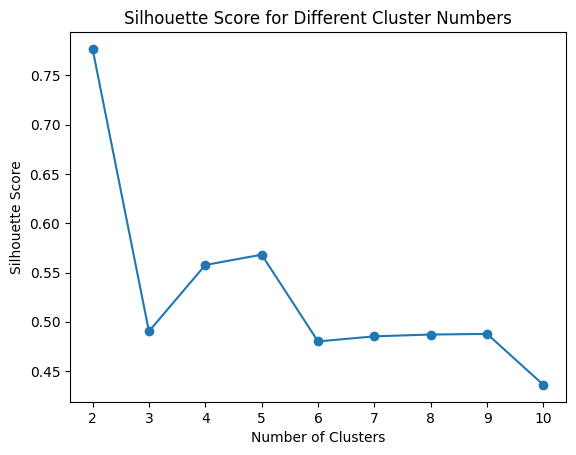

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your data (features)
# Replace this with your actual data
np.random.seed(42)
X = np.random.rand(100, 2)

# Range of cluster numbers to try
cluster_range = range(2, 11)

# Calculate silhouette scores for different cluster numbers
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(kohdf)
    silhouette_scores.append(silhouette_score(kohdf, cluster_labels))

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

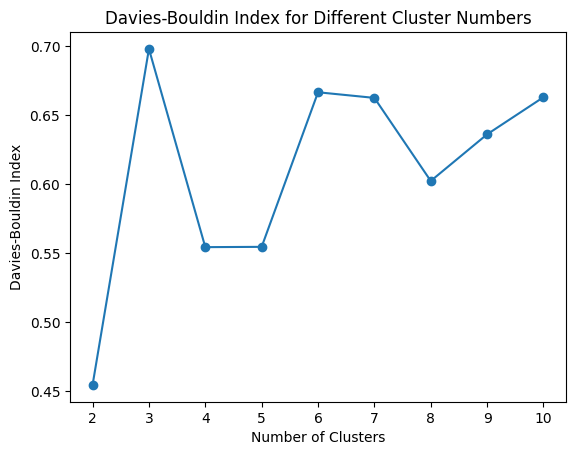

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your data (features)
# Replace this with your actual data
np.random.seed(42)
X = np.random.rand(100, 2)

# Range of cluster numbers to try
cluster_range = range(2, 11)

# Calculate Davies-Bouldin Index for different cluster numbers
davies_bouldin_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(kohdf)
    davies_bouldin_scores.append(davies_bouldin_score(kohdf, cluster_labels))

# Plot the Davies-Bouldin Index
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Cluster Numbers')
plt.show()


In [34]:
print(kohdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  onion laye

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

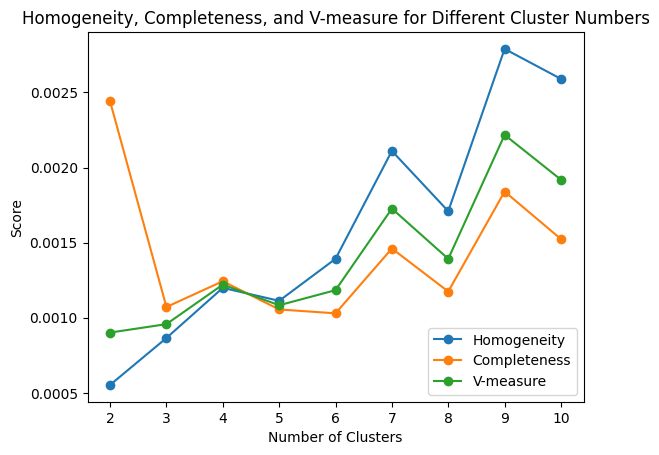

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your data (features)
# Replace this with your actual data
np.random.seed(42)
X = np.random.rand(100, 2)

# Assuming true_labels is the true cluster labels (ground truth)
# Replace this with your actual ground truth labels
Score = np.random.randint(0, 3, size=4039)

# Range of cluster numbers to try
cluster_range = range(2, 11)

# Calculate scores for different cluster numbers
homogeneity_scores = []
completeness_scores = []
v_measure_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(kohdf)

    homogeneity_scores.append(homogeneity_score(Score, cluster_labels))
    completeness_scores.append(completeness_score(Score, cluster_labels))
    v_measure_scores.append(v_measure_score(Score, cluster_labels))

# Plot the scores
plt.plot(cluster_range, homogeneity_scores, label='Homogeneity', marker='o')
plt.plot(cluster_range, completeness_scores, label='Completeness', marker='o')
plt.plot(cluster_range, v_measure_scores, label='V-measure', marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Homogeneity, Completeness, and V-measure for Different Cluster Numbers')
plt.legend()
plt.show()


In [54]:
print(kohdf)

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Boundary_E

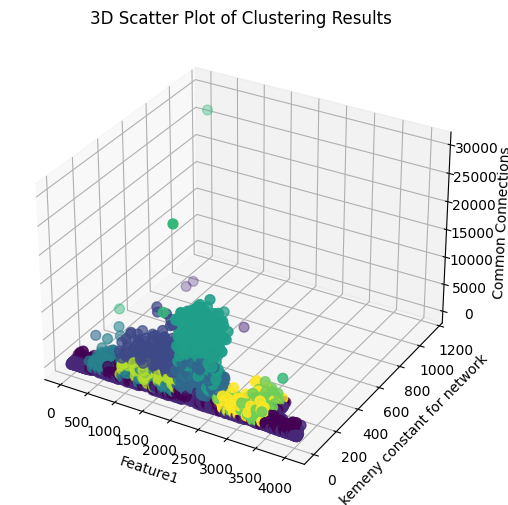

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming df contains your data and 'Cluster' column
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kohdf['Node'], kohdf['kemeny constant for network'], kohdf['Common Connections'], c=kohdf['k=10_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Feature1')
ax.set_ylabel('kemeny constant for network')
ax.set_zlabel('Common Connections')
plt.title('3D Scatter Plot of Clustering Results')
plt.show()


In [ ]:
aggonedf = kmeans_onehopdf.fillna(0)
print(aggonedf)

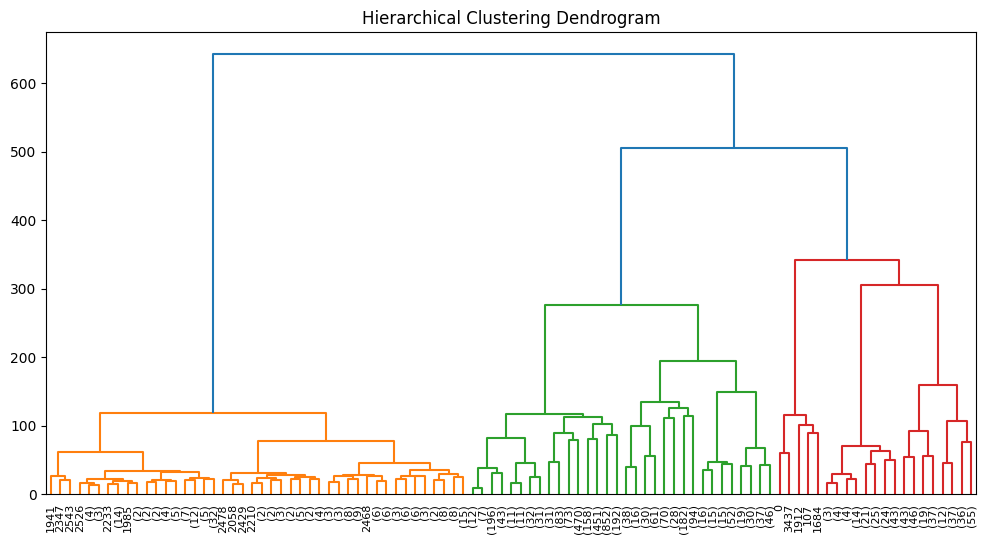

      Node  NodeDegree  0_count  1_count  2_count  3_count  4_count  5_count  \
0        0         347        0       14       27       22       17       12   
1        1          17        0        0        0        0        0        0   
2        2          10        0        0        0        0        0        0   
3        3          17        0        0        0        1        0        1   
4        4          10        0        0        0        0        0        1   
...    ...         ...      ...      ...      ...      ...      ...      ...   
4034  4034           2        0        0        0        0        0        0   
4035  4035           1        0        0        0        0        0        0   
4036  4036           2        0        0        0        0        1        0   
4037  4037           4        0        0        0        0        0        0   
4038  4038           9        0        0        0        0        0        0   

      6_count  7_count  ...  Bridge_Cou

In [58]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame

# Step 1: Standardize the data (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(aggonedf)

# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters = 4  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
aggonedf['Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments
print(aggonedf)


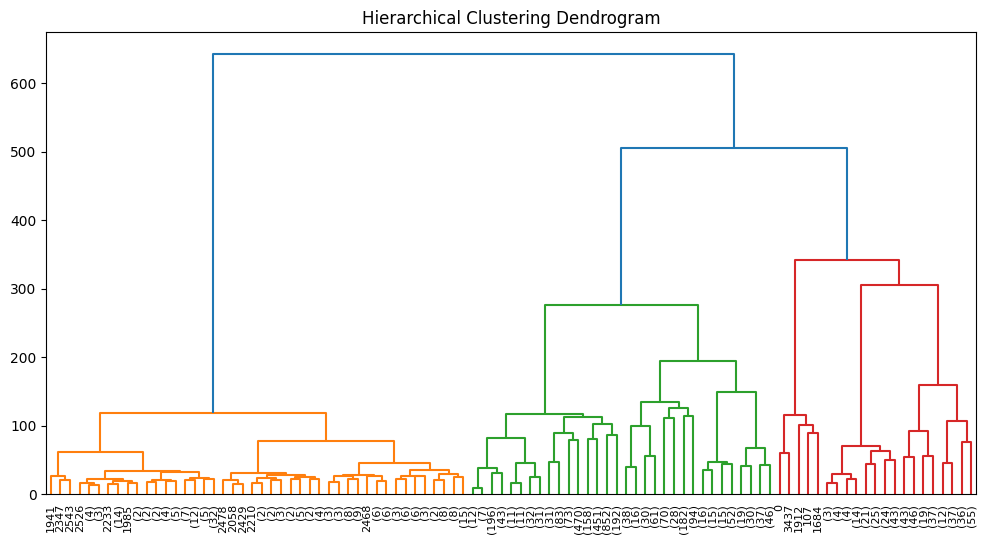

In [59]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame

# Step 1: Standardize the data (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(aggonedf)

# Step 2: Determine the linkage matrix using the ward method
linkage_matrix = linkage(data_standardized, method='ward')

# Step 3: Plot the dendrogram (optional but useful for visualizing hierarchical clustering)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Step 4: Apply Agglomerative Hierarchical Clustering
# Choose the appropriate number of clusters (n_clusters) based on the dendrogram
n_clusters1 = 6  # Replace with your desired number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters1, linkage='ward')
aggonedf['n=6_Cluster'] = hierarchical_clustering.fit_predict(data_standardized)

# Display the DataFrame with cluster assignments



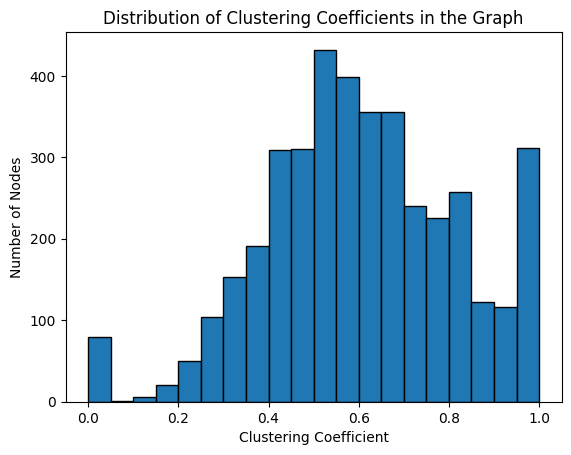

In [61]:
clustering_coefficients = nx.clustering(G)

# Plot histogram of clustering coefficients
plt.hist(clustering_coefficients.values(), bins=20, edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.title('Distribution of Clustering Coefficients in the Graph')
plt.show()

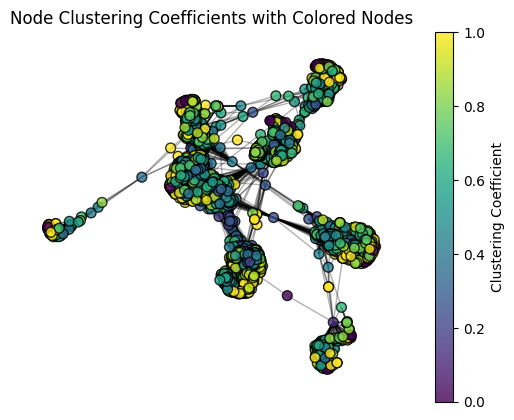

In [62]:
pos = nx.spring_layout(G)

# Plot nodes with colors based on clustering coefficients
node_colors = list(clustering_coefficients.values())
cmap = plt.cm.viridis  # You can choose a different colormap
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=50, edgecolors='k', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Add a colorbar
cbar = plt.colorbar(nodes, label='Clustering Coefficient')

plt.title('Node Clustering Coefficients with Colored Nodes')
plt.axis('off')
plt.show()

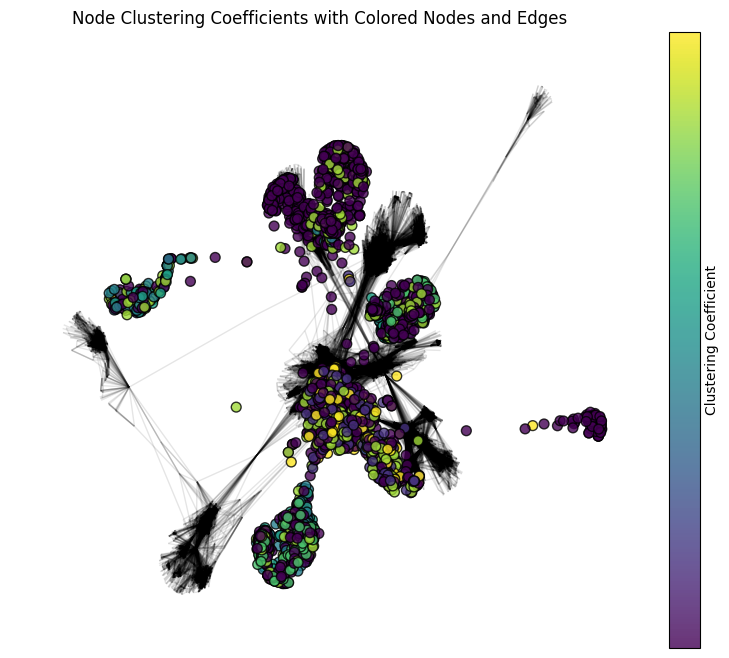

In [67]:
cmap = plt.cm.viridis

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw nodes with colors based on the 'Clustering_Coefficient' column
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color=kohdf['k=8_Cluster'], cmap=cmap, node_size=50, edgecolors='k', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.1)

# Add a colorbar
cbar = plt.colorbar(nodes, label='Clustering Coefficient')
cbar.set_ticks([])  # Hide ticks on the colorbar if not needed

plt.title('Node Clustering Coefficients with Colored Nodes and Edges')
plt.axis('off')
plt.show()

<ipython-input-68-555a4ca823eb>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color=kohdf['k=8_Cluster'], cmap=plt.cm.get_cmap('Set1', len(kohdf['k=8_Cluster'].unique())), node_size=50, edgecolors='k', alpha=0.8)


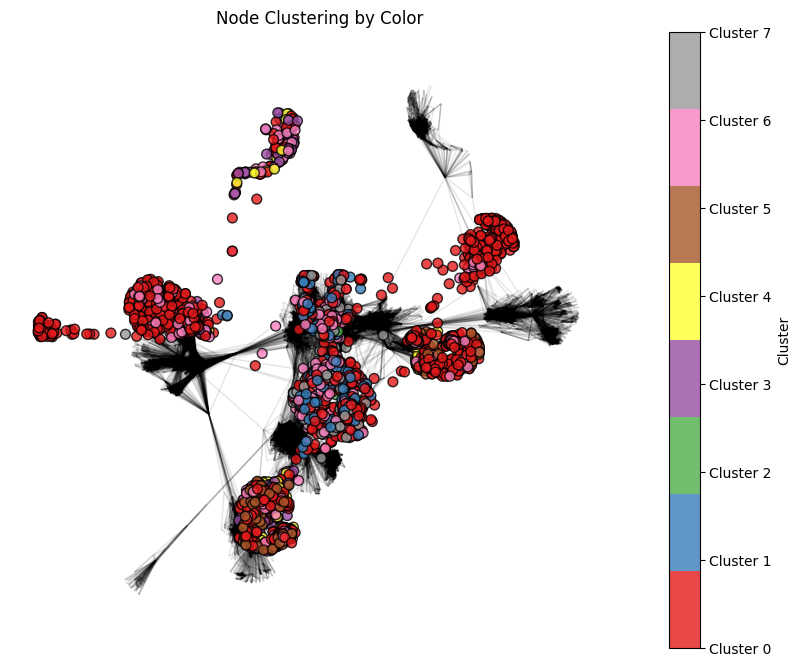

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming G is your graph


# Add edges and nodes to G (replace this with your actual graph)



# Choose a colormap for clusters
cluster_colors = sns.color_palette('Set1', n_colors=len(kohdf['k=8_Cluster'].unique()))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw nodes with colors based on clusters
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color=kohdf['k=8_Cluster'], cmap=plt.cm.get_cmap('Set1', len(kohdf['k=8_Cluster'].unique())), node_size=50, edgecolors='k', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.1)

# Add a colorbar
cbar = plt.colorbar(nodes, ticks=kohdf['k=8_Cluster'].unique(), label='Cluster')
cbar.set_ticklabels([f'Cluster {i}' for i in kohdf['k=8_Cluster'].unique()])

plt.title('Node Clustering by Color')
plt.axis('off')
plt.show()


KeyboardInterrupt: ignored

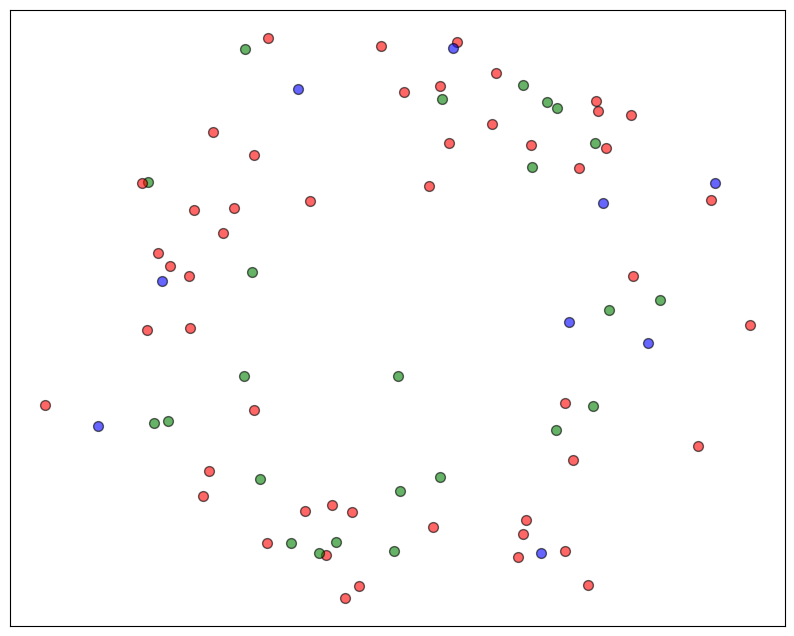

In [5]:
import networkx as nx
import matplotlib.pyplot as plt



# Add edges and nodes to G (replace this with your actual graph)

# Calculate clustering coefficients for each node
clustering_coefficients = nx.clustering(G)

# Define color ranges for different clustering coefficient values
color_ranges = [(0, 0.2, 'blue'), (0.2, 0.5, 'green'), (0.5, 1.0, 'red')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over nodes and plot them with colors based on clustering coefficients
for node, cc in clustering_coefficients.items():
    color = next((color for start, end, color in color_ranges if start <= cc <= end), 'gray')
    nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), nodelist=[node], node_color=color, node_size=50, edgecolors='k', alpha=0.6)

# Draw edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.1)

# Create a custom legend
legend_labels = [f'{start:.2f} - {end:.2f}' for start, end, _ in color_ranges]
legend_colors = [color for _, _, color in color_ranges]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
ax.legend(legend_handles, legend_labels, title='Clustering Coefficient Range', loc='upper right')

plt.title('Node Clustering by Color')
plt.axis('off')
plt.show()


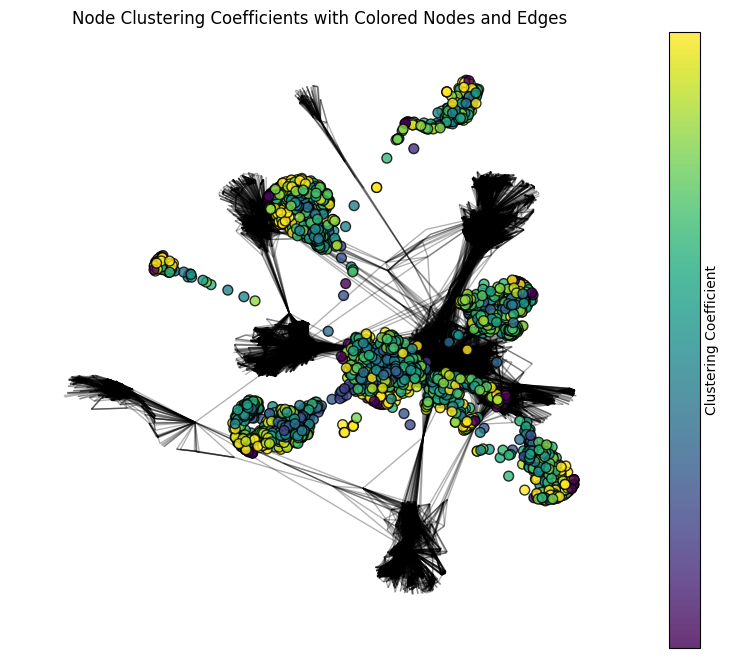

In [63]:
cmap = plt.cm.viridis

# Normalize the clustering coefficients to map to the colormap
norm = plt.Normalize(min(clustering_coefficients.values()), max(clustering_coefficients.values()))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw nodes with colors based on clustering coefficients
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color=list(clustering_coefficients.values()), cmap=cmap, node_size=50, edgecolors='k', alpha=0.8, vmin=norm(min(clustering_coefficients.values())), vmax=norm(max(clustering_coefficients.values())))

# Draw edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.3)

# Add a colorbar
cbar = plt.colorbar(nodes, label='Clustering Coefficient')
cbar.set_ticks([])  # Hide ticks on the colorbar if not needed

plt.title('Node Clustering Coefficients with Colored Nodes and Edges')
plt.axis('off')
plt.show()

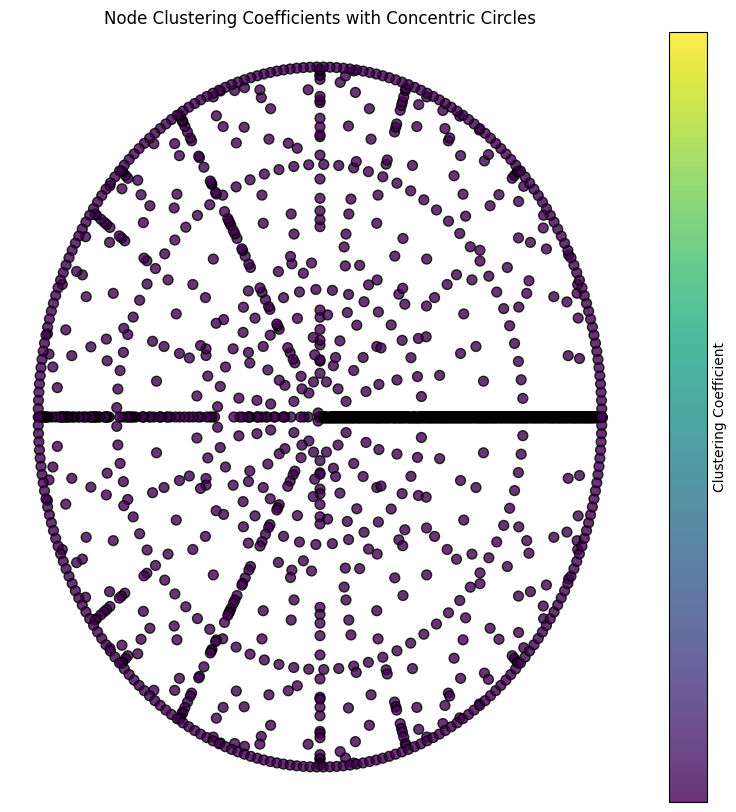

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming G is your graph

# Add edges and nodes to G (replace this with your actual graph)

# Calculate clustering coefficients for each node
clustering_coefficients = nx.clustering(G)

# Determine unique cluster values
unique_clusters = np.unique(list(clustering_coefficients.values()))

# Choose a colormap
cmap = plt.cm.viridis

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Draw nodes with colors based on clustering coefficients and concentric circles
for i, cluster_value in enumerate(unique_clusters):
    nodes_in_cluster = [node for node, cc in clustering_coefficients.items() if cc == cluster_value]
    node_colors = [clustering_coefficients[node] for node in nodes_in_cluster]

    # Draw nodes in concentric circles
    circle_radius = i + 1
    theta = np.linspace(0, 2*np.pi, len(nodes_in_cluster))
    x = circle_radius * np.cos(theta)
    y = circle_radius * np.sin(theta)

    ax.scatter(x, y, s=50, c=node_colors, cmap=cmap, edgecolors='k', alpha=0.8)

# Add a colorbar
cbar = plt.colorbar(ax.collections[0], label='Clustering Coefficient')
cbar.set_ticks([])  # Hide ticks on the colorbar if not needed

plt.title('Node Clustering Coefficients with Concentric Circles')
plt.axis('off')
plt.show()
